In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
df = pd.read_csv("medical_insurance.csv")
print(df)

       person_id  age     sex   region urban_rural    income     education  \
0          75722   52  Female    North    Suburban   22700.0     Doctorate   
1          80185   79  Female    North       Urban   12800.0         No HS   
2          19865   68    Male    North       Rural   40700.0            HS   
3          76700   15    Male    North    Suburban   15600.0  Some College   
4          92992   53    Male  Central    Suburban   89600.0     Doctorate   
...          ...  ...     ...      ...         ...       ...           ...   
99995       6266   50    Male     West       Urban  127200.0         No HS   
99996      54887   42    Male     East    Suburban   21600.0            HS   
99997      76821   41    Male     West       Rural   81900.0            HS   
99998        861   51  Female    South       Urban   43400.0     Doctorate   
99999      15796   44  Female    South       Rural   43700.0  Some College   

      marital_status employment_status  household_size  ...  li

In [40]:
df.shape # (rows, columns)

(100000, 54)

In [41]:
# Check for missing values
df.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [42]:
df.duplicated().sum() # Check for duplicate rows

np.int64(0)

In [43]:
df.describe()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [44]:
df.columns # List all column names

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [45]:
df.dtypes # Check data types of each column

person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible                       int64
copay                    

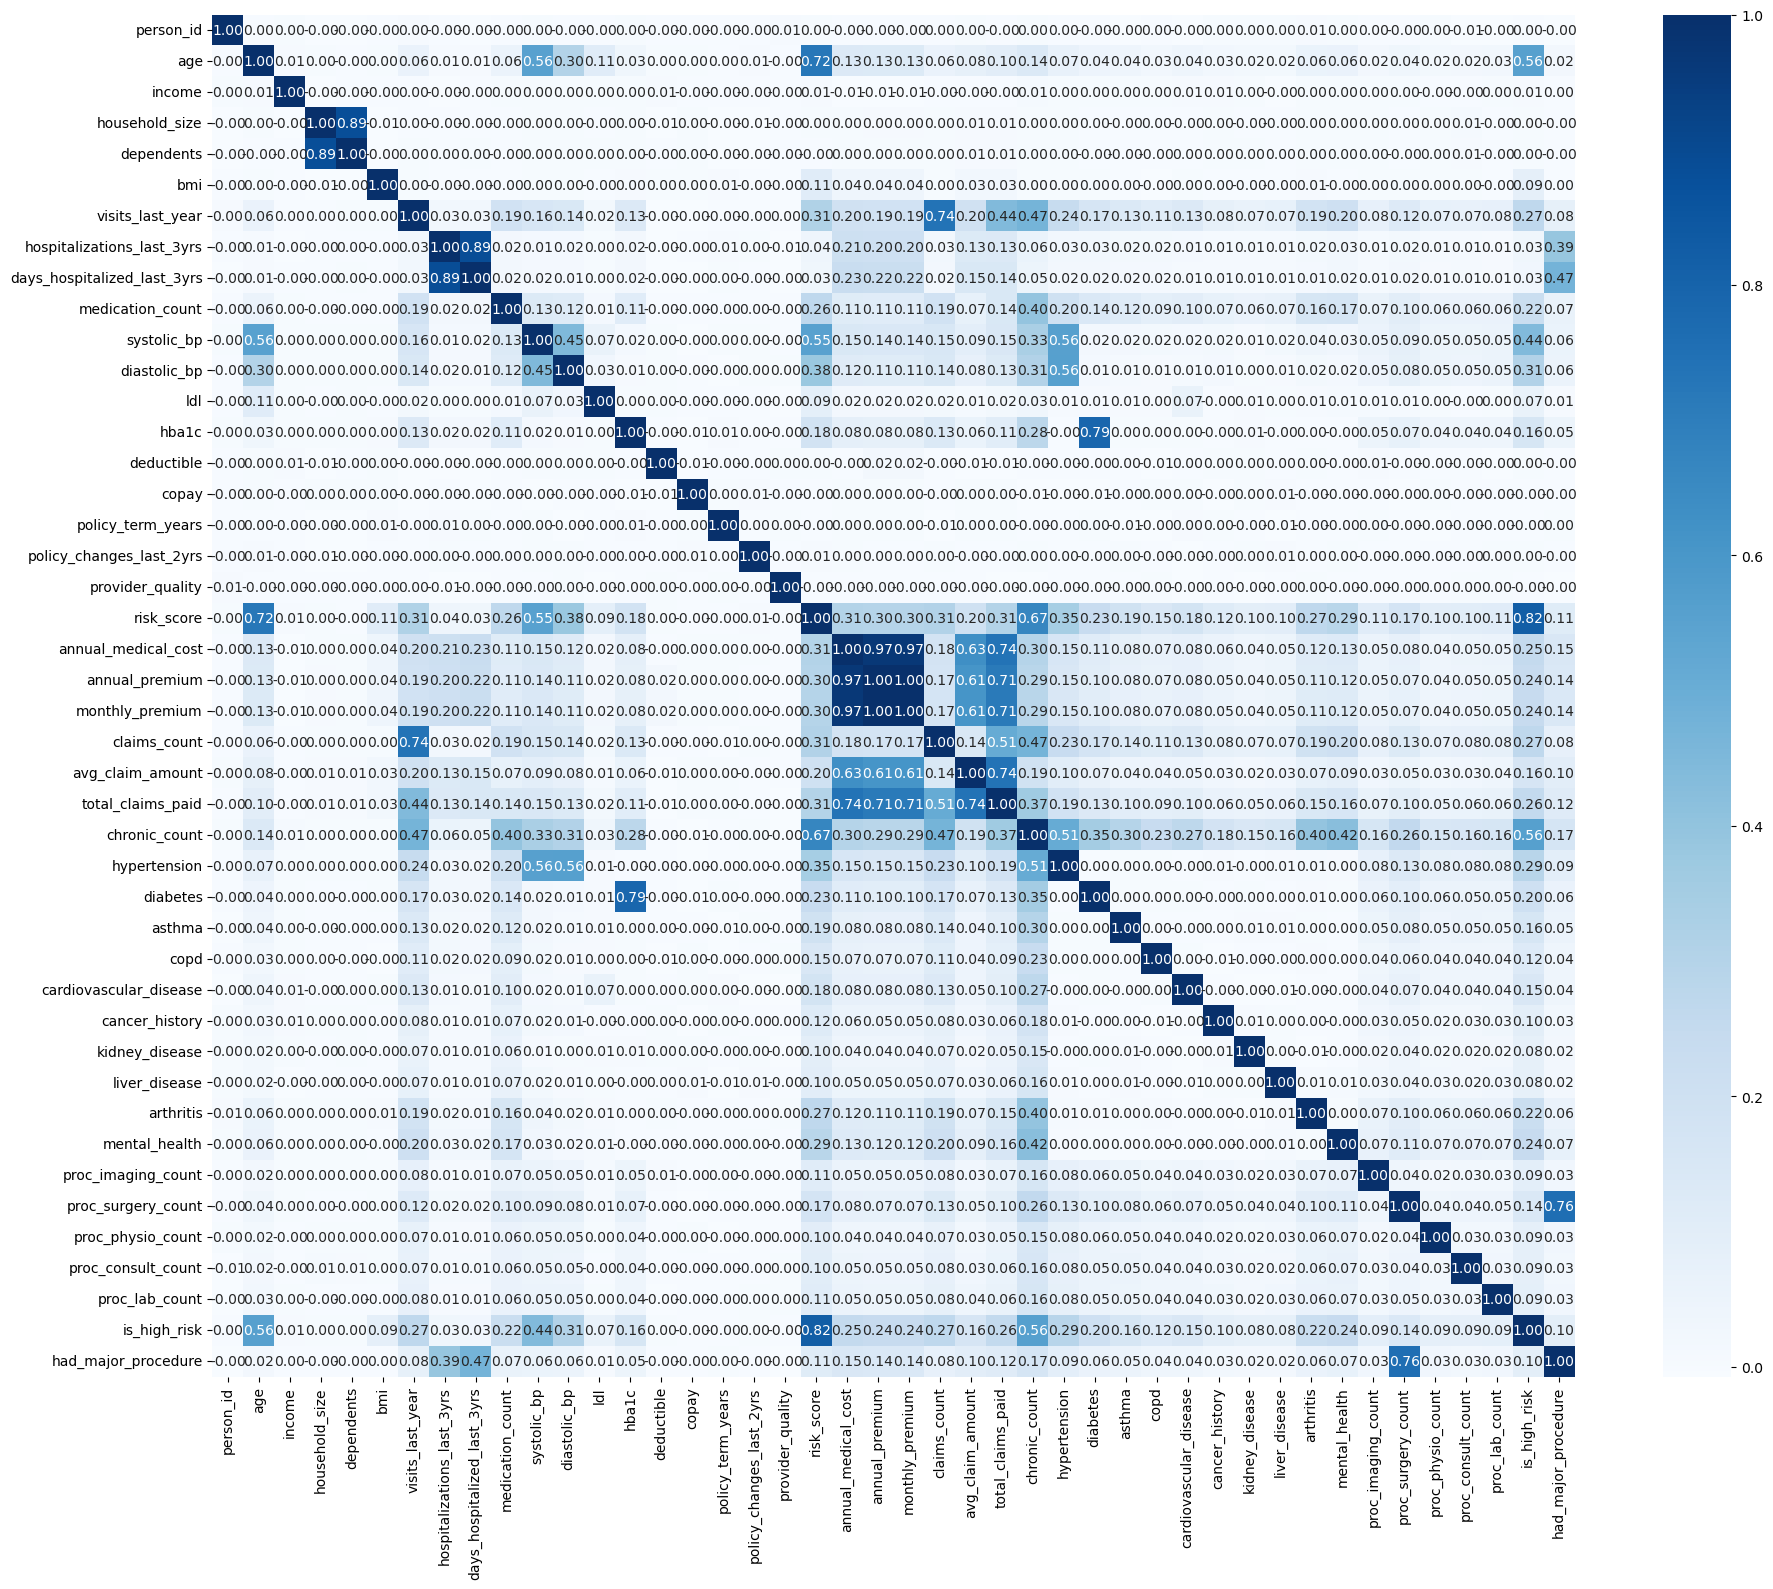

In [46]:
#Check if any of the numberical variables have high correlation
corr = df.select_dtypes(include="number").corr()

plt.figure(figsize=(20, 16))  # større figur for at undgå overlap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [47]:
# Define your target column (the variable you want to predict)
target_col = "annual_medical_cost"

# Drop the columns you don't need
df = df.drop(columns=[
    "person_id", "income", "household_size", "dependents",
    "policy_term_years", "policy_changes_last_2yrs",
    "provider_quality", "monthly_premium", "claims_count",
    "avg_claim_amount", "total_claims_paid"
])


In [48]:
nan_count_per_col = df.isnull().sum()
print(nan_count_per_col)


age                                0
sex                                0
region                             0
urban_rural                        0
education                          0
marital_status                     0
employment_status                  0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
risk_score                         0
annual_medical_cost                0
annual_premium                     0
chronic_count                      0
hypertension                       0
d

In [49]:
df = df.dropna()
df.shape

(69917, 43)

In [50]:
print(df.columns)
df.shape

Index(['age', 'sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'bmi', 'smoker', 'alcohol_freq',
       'visits_last_year', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
       'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier',
       'deductible', 'copay', 'risk_score', 'annual_medical_cost',
       'annual_premium', 'chronic_count', 'hypertension', 'diabetes', 'asthma',
       'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      dtype='object')


(69917, 43)

In [51]:
# Sikker drop (kun hvis de findes)
drop_cols = [c for c in drop_cols if c in df.columns]
df_model = df.drop(columns=drop_cols).copy()



NameError: name 'drop_cols' is not defined

In [ ]:
# Tjek at target findes
assert target_col in df_model.columns, f"Kunne ikke finde '{target_col}' i kolonnerne."


In [ ]:
# ===== 2) X / y =====
y = df_model[target_col].values
X = df_model.drop(columns=[target_col])

In [ ]:
# ===== 3) Identificér typer & evt. lav one-hot =====
cat_cols = [c for c in X.columns if X[c].dtype == "object"]
num_cols = [c for c in X.columns if c not in cat_cols]

In [ ]:

# (Valgfrit) fjern helt konstante features, som kan give problemer
const_cols = [c for c in X.columns if X[c].nunique(dropna=False) <= 1]
if const_cols:
    X = X.drop(columns=const_cols)
    cat_cols = [c for c in cat_cols if c not in const_cols]
    num_cols = [c for c in num_cols if c not in const_cols]

In [ ]:
# ===== 4) Train/test split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# ===== 5) Preprocess: skalér numeriske + one-hot kategoriske =====
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

In [ ]:
# ===== 6) Model: Lineær Regression =====
linreg = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LinearRegression())
])

linreg.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'visits_last_year',
                                                   'hospitalizations_last_3yrs',
                                                   'days_hospitalized_last_3yrs',
                                                   'medication_count',
                                                   'systolic_bp',
                                                   'diastolic_bp', 'ldl',
                                                   'hba1c', 'deductible',
                                                   'copay', 'risk_score',
                                                   'annual_p...
                                                   'proc_physio_count',
                                                   'proc_consult_count',
                                                   'proc_lab_count', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'region',
                                                   'urban_rural', 'education',
                                                   'marital_status',
                                                   'employment_status',
                                                   'smoker', 'alcohol_freq',
                                                   'plan_type',
                                                   'network_tier'])])),
                ('model', LinearRegression())])

In [ ]:
# ===== 7) Evaluér =====
y_pred = linreg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression  |  R²: {r2:.4f}  RMSE: {rmse:.2f}")


Linear Regression  |  R²: 0.9644  RMSE: 591.79


In [ ]:
# ===== 8) (Valgfrit) Ridge & Lasso til sammenligning =====
ridge = Pipeline(steps=[
    ("prep", preprocess),
    ("model", RidgeCV(alphas=np.logspace(-3, 3, 25), cv=5))
])
ridge.fit(X_train, y_train)
y_pred_r = ridge.predict(X_test)
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
r2_r = r2_score(y_test, y_pred_r)
print(f"RidgeCV             |  R²: {r2_r:.4f}  RMSE: {rmse_r:.2f}  alpha*: {ridge.named_steps['model'].alpha_:.4f}")

lasso = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LassoCV(alphas=np.logspace(-3, 1, 20), cv=5, max_iter=10000))
])
lasso.fit(X_train, y_train)
y_pred_l = lasso.predict(X_test)
rmse_l = np.sqrt(mean_squared_error(y_test, y_pred_l))
r2_l = r2_score(y_test, y_pred_l)
print(f"LassoCV             |  R²: {r2_l:.4f}  RMSE: {rmse_l:.2f}  alpha*: {lasso.named_steps['model'].alpha_:.4f}")


RidgeCV             |  R²: 0.9644  RMSE: 591.79  alpha*: 5.6234
LassoCV             |  R²: 0.9644  RMSE: 591.75  alpha*: 0.5456


In [ ]:
# ===== 9) Koeficienter (fortolkning) for Lineær Regression =====
# Hent feature-navne efter preprocessing:
oh = linreg.named_steps["prep"].named_transformers_.get("cat")
num_features = num_cols
cat_features = []
if oh is not None and hasattr(oh.named_steps["onehot"], "get_feature_names_out"):
    cat_features = list(oh.named_steps["onehot"].get_feature_names_out(cat_cols))

feature_names = num_features + cat_features

coefs = linreg.named_steps["model"].coef_
coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coefs})\
            .sort_values("coefficient", ascending=False)

print("\nTop positive koefficienter:")
print(coef_df.head(10).to_string(index=False))

print("\nTop negative koefficienter:")
print(coef_df.tail(10).sort_values("coefficient").to_string(index=False))


Top positive koefficienter:
                    feature  coefficient
             annual_premium  3096.559768
                 risk_score    27.023211
days_hospitalized_last_3yrs    15.672382
        had_major_procedure    15.276738
                region_West    14.410077
     marital_status_Widowed    13.239621
           visits_last_year    10.798778
      marital_status_Single     9.929415
              chronic_count     9.327194
               region_South     8.844275

Top negative koefficienter:
                feature  coefficient
  network_tier_Platinum -1818.397211
      network_tier_Gold -1113.893790
    network_tier_Silver  -558.400408
             deductible   -77.558894
           smoker_Never   -52.951923
          smoker_Former   -32.350886
    alcohol_freq_Weekly   -22.692332
alcohol_freq_Occasional   -16.100672
     proc_surgery_count   -12.725101
           is_high_risk    -7.949417
